
# Workshop 02:
---
##### Concepts:
- Basic Python
    - Loops, Dict, functions, Packages
- Read & Write Text files
    - Csv file, Text file
    - Loop inside a Folder
- explore some packages
    


### Part 1
---    

Metric collector - #cpu #memory usage percentage
---

1. Run some function Every 30 Second
2. The function is to collect cpu, mem usage (percentage) of your machine.
3. Save the metrics into a csv file..

*Find & explore package in `pypi.org` that gives `cpu`, `memory` percentage...*


In [50]:
from datetime import datetime
str(datetime.now()).split()[0]

'2020-02-14'

In [51]:
# code here

SECONDS_TO_WAIT =10
from time import sleep
import psutil
from datetime import datetime
import csv

def collect_metric():
    """
    Input: N/a
    Output: Return 
    Tuple: (cpu, mem, timestamp)
    """
    
    cpu = psutil.cpu_percent()
    mem = psutil.virtual_memory().percent
    timestamp = str(datetime.now())

    row_tpl = (cpu, mem, timestamp)
    return row_tpl

def save_metric_to_csv(fname, row, mode="a"):
    """
    Input: cpu,mem,timestamp
        fname: file_path/location to the file.. *.csv
        row  : tuple (?, ? , ?)
               list  [?, ? , ?]
               Example: (10,20,'2020-02-12')
    Output: None
    """
    #newline="" is to fix windows extra new lines bug when using csv module
    with open(fname, mode=mode, newline="" ) as f:
        csv_writer = csv.writer(f)
        csv_writer.writerow ( row )

date = str(datetime.now()).split()[0]
fname = f"cpu_mem_{date}.csv"
header_row =  ('cpu','mem','timestamp')
save_metric_to_csv(fname, header_row, mode="w")

try:
    while True:
        
        row = collect_metric() #(10,20,"2020-02-12 18:54:43.464747")
        
        save_metric_to_csv(fname, row) #save the row to the file
        sleep(SECONDS_TO_WAIT) #wait for 10
        
except KeyboardInterrupt:
    print("Stopping the loop....")

Stopping the loop....


In [5]:
row = collect_metric()
save_metric_to_csv("cpu_mem.csv", row)

#### Test your implementation with the following code

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(fname)
df.head()

,cpu,mem,timestamp
0,11.4,43.3,2020-02-14 19:55:52.386561
1,18.5,43.6,2020-02-14 19:56:02.387650
2,17.3,43.5,2020-02-14 19:56:12.387789
3,21.7,43.7,2020-02-14 19:56:22.390487
4,17.5,43.5,2020-02-14 19:56:32.391569


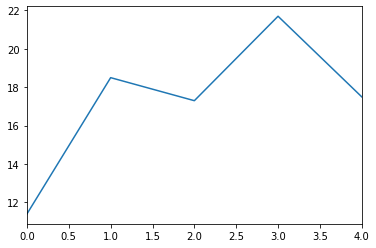

In [53]:
df.cpu.plot()

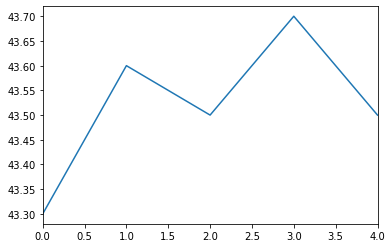

In [54]:
df.mem.plot()

In [57]:
!ipconfig


Windows IP Configuration


Ethernet adapter Ethernet 2:

   Media State . . . . . . . . . . . : Media disconnected
   Connection-specific DNS Suffix  . : 

Ethernet adapter Ethernet:

   Media State . . . . . . . . . . . : Media disconnected
   Connection-specific DNS Suffix  . : 

Wireless LAN adapter Local Area Connection* 1:

   Media State . . . . . . . . . . . : Media disconnected
   Connection-specific DNS Suffix  . : 

Wireless LAN adapter Wi-Fi:

   Connection-specific DNS Suffix  . : mbox.com
   Link-local IPv6 Address . . . . . : fe80::7cd1:3971:fbd4:753f%6
   IPv4 Address. . . . . . . . . . . : 192.168.3.113
   Subnet Mask . . . . . . . . . . . : 255.255.255.0
   Default Gateway . . . . . . . . . : 192.168.3.1

Wireless LAN adapter Local Area Connection* 10:

   Connection-specific DNS Suffix  . : 
   Link-local IPv6 Address . . . . . : fe80::81d4:ce55:7aa4:6400%2
   IPv4 Address. . . . . . . . . . . : 192.168.137.1
   Subnet Mask . . . . . . . . . . . : 255.255.255.0
   De

In [ ]:
# ip = 192.168.1.12
# port = 27017

In [66]:
import psutil
from pymongo import MongoClient
client = MongoClient(host="192.168.1.12",port=27017)

In [67]:
collection = client.mydb.studentprofile_collection

In [68]:
record = {
    "name": "bala",
    "cpu" : psutil.cpu_percent(),
    "mem" : psutil.virtual_memory().percent,
    "timestamp": str(datetime.now()),
}

collection.insert_one( record )

In [82]:
pd.DataFrame(collection.find())

,_id,cpu,mem,name,timestamp
0,5e4691ce4cde471fab7ece36,12.4,45.6,bala,2020-02-14 20:25:50.055323
1,5e469325107c18615e01e47d,2.9,67.3,Wei Sheng,2020-02-14 20:31:33.554018
2,5e4693294cde471fab7ece38,17.7,47.2,bala,2020-02-14 20:31:37.947512
3,5e46932d8c410704784e9ae0,8.7,59.8,ZH,2020-02-14 20:31:41.287315
4,5e46936e21cb3cca07c42472,4.0,23.5,Dennis,2020-02-14 20:32:46.893918
5,5e4693a25e08bd9f7047f757,34.6,70.6,Eddie,2020-02-14 20:33:38.073208
6,5e4693cbe2b371f6ef60ac8f,13.7,36.2,XG,2020-02-14 20:34:19.000627
7,5e469431cd7656f0646811af,13.5,69.2,ying,2020-02-14 20:36:01.075627
8,5e46943f739289f886170bf4,6.1,30.3,bala,2020-02-14 20:36:15.751992
9,5e469469e7d82cc246f4a80b,4.0,82.6,adeline,2020-02-14 20:36:57.977384


In [81]:
import pymongo
client ->>>>>>>>>>>>>>>>(10.20.10.40, 27017) MongoDB (Server)

collection.find()
collection.insert_one( ???)


import requests

host = 192.168.1.12 (internal ip)
     = 10.?.?.? (internal ip)
     = 172.?.?.? (internal ip)
        
     = ?.?.?.? ( $$$ PUBLIC ip)
>>>>>>>>>>>>>>>> (host , ?) API Server (weather API)

>>>>>>>>>>>>>>>> (host , ?) Server (weather API)
host= https://data.gov.sg/group/economy
host= https://104.26.14.175:443/group/economy
host= http://192.168.1.12:8080/index.html
http://www.pythontutor.com/visualize.html#mode=edit
https://data.gov.sg/api/action/datastore_search?resource_id=f5542e9d-58d5-48dc-b8c6-4ba692318b41&limit=5
PORT= 443


url = "https://data.gov.sg/group/economy"

response = chrome_browser(url)

Response
    - html, text (Web server)
    - json (API)
    


In [ ]:
https://data.gov.sg/api/action/datastore_search?resource_id=f5542e9d-58d5-48dc-b8c6-4ba692318b41&limit=5
    
protocol: sheme?
    https://
        data.gov.sg - domain / ip : port
        /api/action/datastore_search - path/route
        ?
        resource_id=f5542e9d-58d5-48dc-b8c6-4ba692318b41
        &
        limit=10

    

In [ ]:
u1 = https://newsapi.org/v2/everything?q=bitcoin&from=2020-01-14&sortBy=publishedAt
bala,prasanna,ken,
u2 = https://newsapi.org/v2/everything?q=bitcoin&from=2020-01-14&sortBy=publishedAt&apiKey=ed87a54c3fa7469fa0b8a824ee797fd1
u2 = https://newsapi.org/v2/everything?q=bitcoin&from=2020-01-14&sortBy=publishedAt&apiKey=fde7214475a44b8298de94e00de86641

1.how many query param (4 query params)
    ?q=bitcoin
    &
    from=2020-01-14
    &
    sortBy=publishedAt
    &
    apiKey=ed87a54c3fa7469fa0b8a824ee797fd1
2 what are they
    q,
    from
    sortBy
    apiKey
3. what the route/path?
    /v2/everything
4. what is the domain name & port number
    newsapi.org
5. protocol ??
    https



## END